In [1]:
from pathlib import Path
import pandas as pd
import mne
# from functools import partial

In [2]:
d_version = 'v2.0'
datasets_path = Path('/data0/practical-sose23/brain-age/data/')

In [3]:
def get_paths(datasets_path, dataset_name, raw_dir, f_extension):
    dataset_path = datasets_path / dataset_name / raw_dir
    return list(dataset_path.rglob(f'*.{f_extension}'))

In [4]:
print('Number of instances in bap:', len([x for x in get_paths(datasets_path, 'bap', 'raw', 'vhdr') if 'preprocessed' in list(x.parts)]))
print('Number of instances in hbn:', len(get_paths(datasets_path, 'hbn', 'unzipped', 'mat')))
print('Number of instances in lemon:', len(get_paths(datasets_path, 'lemon', 'LEMON_RAW', 'vhdr')))

Number of instances in bap: 189
Number of instances in hbn: 2260
Number of instances in lemon: 215


In [5]:
# def get_metadata(datasets_path, dataset_name):
#     df = pd.read_csv(datasets_path / dataset_name / f'{dataset_name}-metadata.csv')
#     print(f'{dataset_name} age mean:', round(df['Age'].mean(), 2))
#     print(f'{dataset_name} age std:', round(df['Age'].std(), 2))
#     return df

In [6]:
# _ = get_metadata(datasets_path, 'bap')
# _ = get_metadata(datasets_path, 'hbn')
# _ = get_metadata(datasets_path, 'lemon')

In [7]:
def print_metadata(datasets_path, dataset_name):
    df = pd.read_csv(datasets_path / dataset_name / f'{dataset_name}-metadata.csv')
    print(f'{dataset_name} age mean:', round(df['Age'].mean(), 2))
    print(f'{dataset_name} age std:', round(df['Age'].std(), 2))
    
    # Calculate the total count of males and females
    total_count = len(df)
    males_count = len(df[df['Sex'] == 'm'])
    females_count = len(df[df['Sex'] == 'f'])

    # Calculate the percentage of males and females
    males_percentage = round((males_count / total_count) * 100, 2)
    females_percentage = round((females_count / total_count) * 100, 2)
    print(f'{dataset_name}: {males_percentage}% m / {females_percentage}% f')

In [8]:
print_metadata(datasets_path, 'bap')
print_metadata(datasets_path, 'hbn')
print_metadata(datasets_path, 'lemon')

bap age mean: 57.85
bap age std: 13.9
bap: 31.75% m / 68.25% f
hbn age mean: 10.43
hbn age std: 3.58
hbn: 64.06% m / 35.91% f
lemon age mean: 39.14
lemon age std: 20.23
lemon: 64.04% m / 35.96% f


In [9]:
file_path = Path('/data0/practical-sose23/brain-age/data/bap/raw/chronic_pain_patients/various/preprocessed/Exp_eyes_closed_vp15_eyes_closed.vhdr')
sfreq = 100
filters = {"lpf":45, "hpf":0.1}

In [10]:
# Load EEG data into an EEG raw object
eeg_obj = mne.io.read_raw_brainvision(file_path, verbose=False, preload=True)
eeg_obj = eeg_obj.drop_channels(['LE', 'RE'])

# Set channel types for all channels to 'eeg'
eeg_obj.set_channel_types({channel: 'eeg' for channel in eeg_obj.ch_names})

montage = mne.channels.make_standard_montage("standard_1020")
eeg_obj = eeg_obj.set_montage(montage)

In [11]:
eeg_obj

<RawBrainVision | Exp_eyes_closed_vp15_eyes_closed.dat, 63 x 300002 (300.0 s), ~144.3 MB, data loaded>

Setting 2289 of 300002 (0.76%) samples to NaN, retaining 297713 (99.24%) samples.
Effective window size : 0.256 (s)


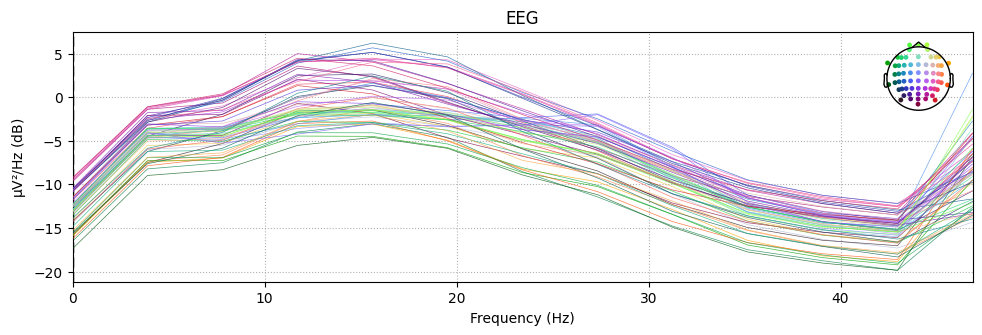

In [18]:
eeg_obj.compute_psd(fmax=50).plot(show='line')

Setting 230 of 30000 (0.77%) samples to NaN, retaining 29770 (99.23%) samples.
Effective window size : 2.560 (s)


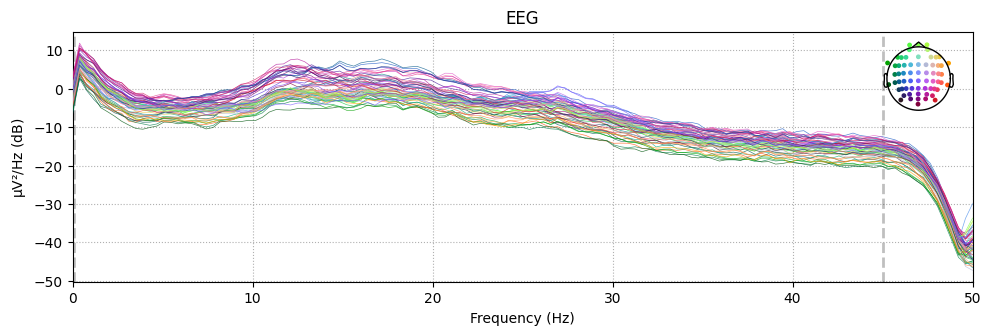

In [24]:
eeg_obj1 = eeg_obj.copy()
eeg_obj1 = eeg_obj1.resample(sfreq=sfreq)
eeg_obj1 = eeg_obj1.filter(l_freq=None, h_freq=filters['lpf'], h_trans_bandwidth=5, verbose=False)
eeg_obj1 = eeg_obj1.filter(l_freq=filters['hpf'], h_freq=None, h_trans_bandwidth=5, verbose=False)

eeg_obj1.compute_psd().plot()

Setting 230 of 30000 (0.77%) samples to NaN, retaining 29770 (99.23%) samples.
Effective window size : 2.560 (s)


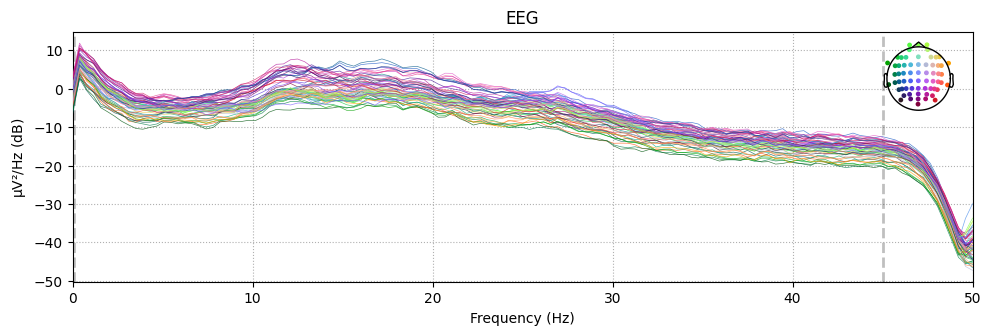

In [31]:
eeg_obj3 = eeg_obj.copy()
eeg_obj3 = eeg_obj3.resample(sfreq=sfreq)
eeg_obj3 = eeg_obj3.filter(l_freq=None, h_freq=filters['lpf'], h_trans_bandwidth=5, verbose=False)
eeg_obj3 = eeg_obj3.filter(l_freq=filters['hpf'], h_freq=None, h_trans_bandwidth=5, verbose=False)

eeg_obj3.compute_psd(fmax=50).plot()

Setting 2289 of 300002 (0.76%) samples to NaN, retaining 297713 (99.24%) samples.
Effective window size : 0.256 (s)


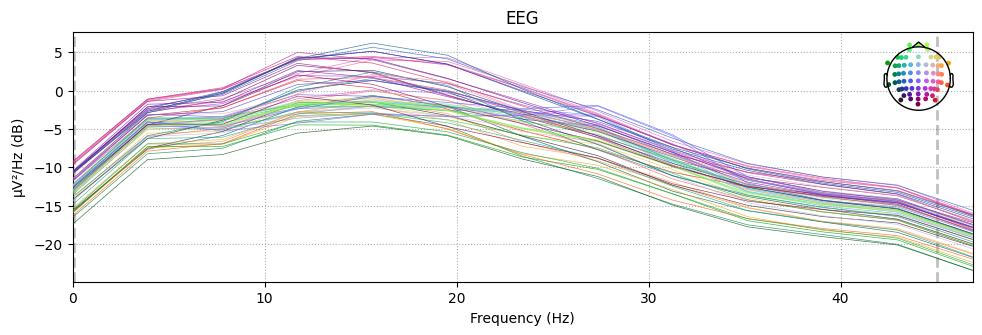

In [13]:
eeg_obj2 = eeg_obj.copy()
eeg_obj2 = eeg_obj2.filter(l_freq=filters['hpf'], h_freq=filters['lpf'], h_trans_bandwidth=5, verbose=False)
eeg_obj2.compute_psd(fmax=50).plot()